In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import yfinance as yf

In [21]:

# Fetch data from Yahoo Finance
stock = yf.download('NVDA', start='2007-01-01', end='2024-04-15')

print("Data of Nvidia:", stock)

[*********************100%%**********************]  1 of 1 completed

Data of Nvidia:                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2007-01-03    6.178333    6.253333    5.798333    6.013333    5.516042   
2007-01-04    5.991667    6.013333    5.838333    5.985000    5.490054   
2007-01-05    5.843333    5.866667    5.570000    5.610000    5.146065   
2007-01-08    5.630000    5.760000    5.533333    5.651667    5.184286   
2007-01-09    5.660000    5.698333    5.535000    5.541667    5.083381   
...                ...         ...         ...         ...         ...   
2024-04-08  887.000000  888.299988  867.320007  871.330017  871.330017   
2024-04-09  874.419983  876.349976  830.219971  853.539978  853.539978   
2024-04-10  839.260010  874.000000  837.090027  870.390015  870.390015   
2024-04-11  874.200012  907.390015  869.260010  906.159973  906.159973   
2024-04-12  896.989990  901.750000  875.299988  881.859985  881.859985   

               Volume

In [22]:
# drop the unwanted coloumns
stock.drop('Adj Close',axis = 1,inplace = True)

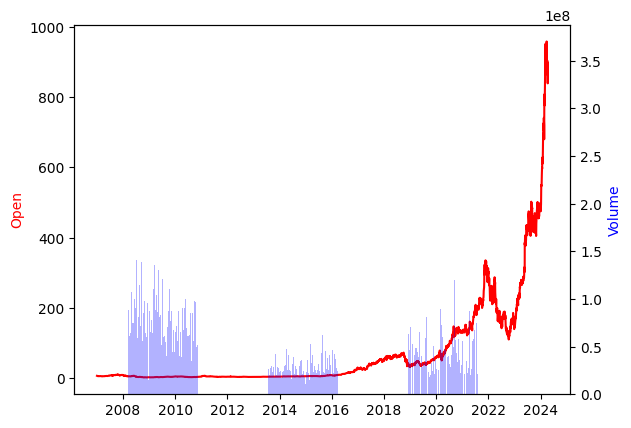

In [23]:
f = pd.DataFrame(stock)

# Plotting
fig, ax1 = plt.subplots()

# Plot line
ax1.plot(f['Open'], color='r')
ax1.set_ylabel('Open', color='r')

# Creating another y-axis for bar plot
ax2 = ax1.twinx()

# Plot bar
ax2.bar(f.index, f['Volume'], alpha=0.3, color='b',width=0.5)
ax2.set_ylabel('Volume', color='b')

plt.show()

In [24]:
 X = stock[['Open','High','Volume','Low']]
 y = stock['Close']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.035,random_state=1)

In [26]:
X_train.shape

(4196, 4)

In [27]:
X_test.shape

(153, 4)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor = LinearRegression()

In [29]:
regressor.fit(X_train,y_train)

LinearRegression()

In [30]:
print(regressor.coef_)

[-6.69621563e-01  7.98414374e-01  3.22292415e-10  8.73948603e-01]


In [31]:
predicted = regressor.predict(X_test)

In [32]:
compare = pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [33]:
print(compare)

            Actual Price  Predicted Price
Date                                     
2020-06-24     92.355003        92.751858
2018-06-08     65.570000        65.793819
2022-02-08    251.080002       247.886623
2011-10-14      3.930000         3.886332
2010-09-15      2.640000         2.604106
...                  ...              ...
2016-03-16      8.275000         8.210975
2019-09-11     46.082500        46.297164
2018-11-07     53.447498        53.742309
2014-03-19      4.640000         4.687949
2023-06-15    426.529999       428.688569

[153 rows x 2 columns]


In [34]:
compare.head(5)

,Actual Price,Predicted Price
Date,,
2020-06-24,92.355003,92.751858
2018-06-08,65.570000,65.793819
2022-02-08,251.080002,247.886623
2011-10-14,3.930000,3.886332
2010-09-15,2.640000,2.604106


In [35]:
regressor.score(X_test,y_test)

0.9998700655089804

<Axes: xlabel='Date'>

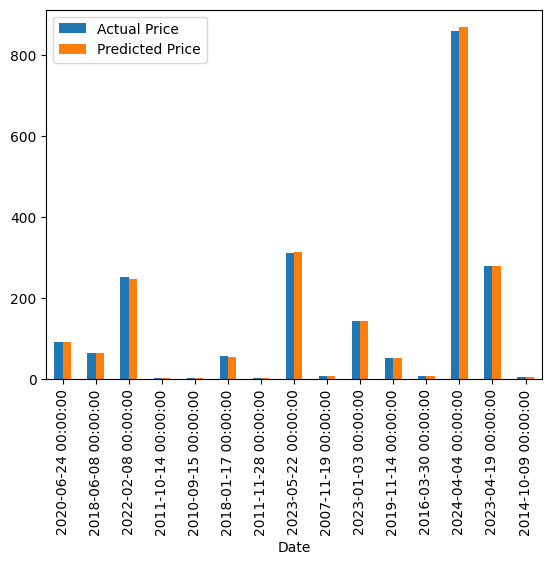

In [36]:
graph = compare.head(15)
graph.plot(kind='bar')